In [1]:
#Import Libraries

import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
#Load the Dataset

df=pd.read_csv("survey.csv")



In [6]:
df.shape

(1259, 27)

In [7]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [9]:
df.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

# Data Cleaning

In [10]:
#Filter valid ages
df=df[(df['Age']>=18) & (df['Age']<=65)]




In [11]:
#Normalize gender labels
def clean_gender(gender):
    gender = gender.strip().lower()
    if any(x in gender for x in ['male', 'm']) and not 'female' in gender:
        return 'Male'
    elif any(x in gender for x in ['female', 'f']) and not 'male' in gender:
        return 'Female'
    elif 'trans' in gender or 'non-binary' in gender or 'queer' in gender:
        return 'Transgender/Other'
    else:
        return 'Other'

df['Gender'] = df['Gender'].apply(clean_gender)


In [12]:
#drop irrelavent columns if exist
df=df.drop(columns=['comments','Timestamp'],errors='ignore')



In [13]:
df.head()

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Other,United States,IL,NaN,No,Yes,Often,6-25,No,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,Male,United States,IN,NaN,No,No,Rarely,More than 1000,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


# Univariate Analysis

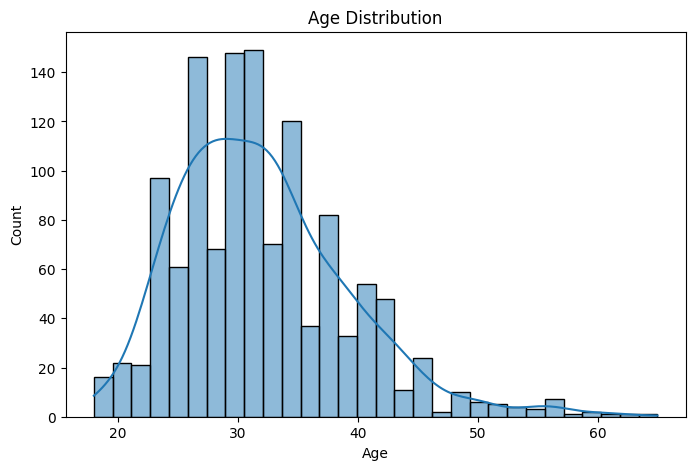

In [14]:
#Age Distribution

plt.figure(figsize=(8,5))
sns.histplot(df['Age'],bins=30,kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()




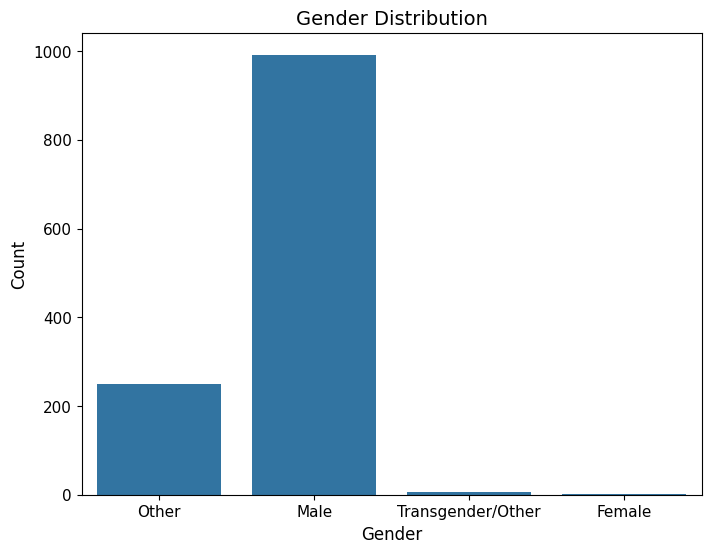

In [24]:
#Gender count
plt.figure(figsize=(8,6))  
sns.countplot(data=df, x='Gender')
plt.title('Gender Distribution', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()



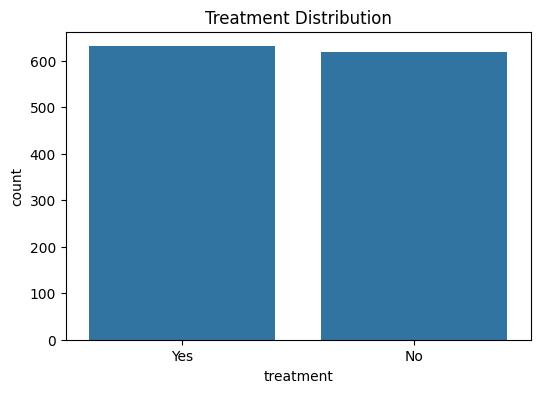

In [15]:
#treatment count
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='treatment')
plt.title('Treatment Distribution')
plt.show()




# Bivariate Analysis

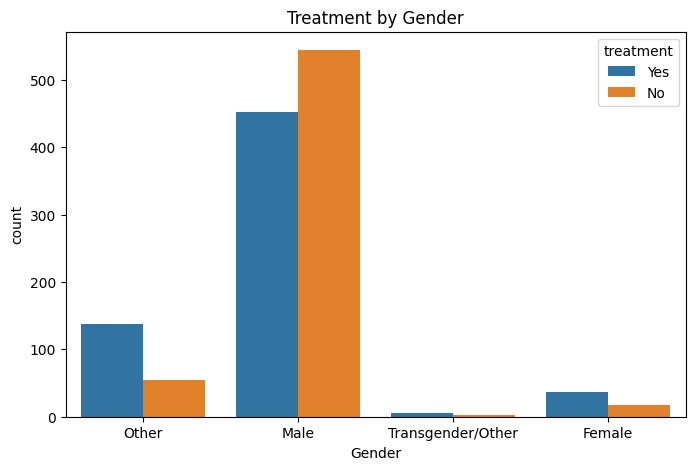

In [16]:
#treatment by gender

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Gender', hue='treatment')
plt.title('Treatment by Gender')
plt.show()



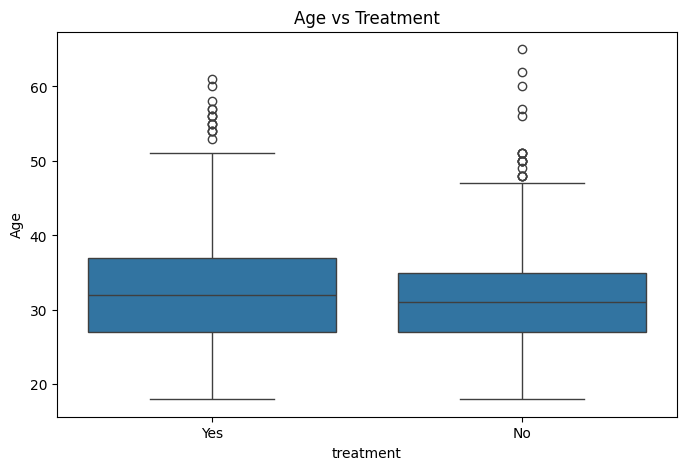

In [17]:
# Age vs Treatment
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='treatment', y='Age')
plt.title('Age vs Treatment')
plt.show()

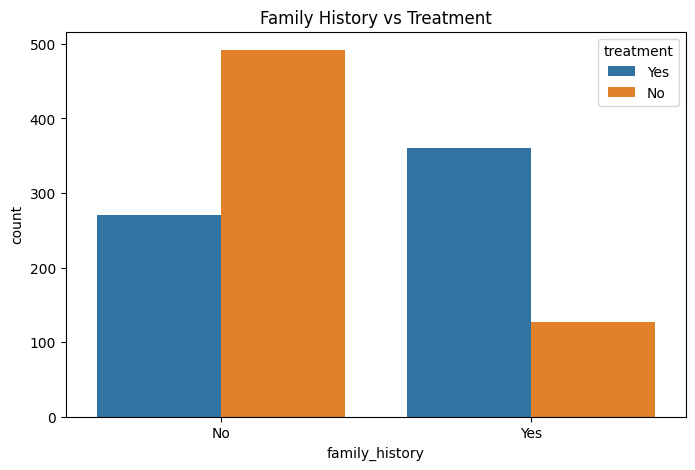

In [29]:
# Family History vs Treatment
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='family_history', hue='treatment')
plt.title('Family History vs Treatment')
plt.show()

# Geographic and Grouped Analysis

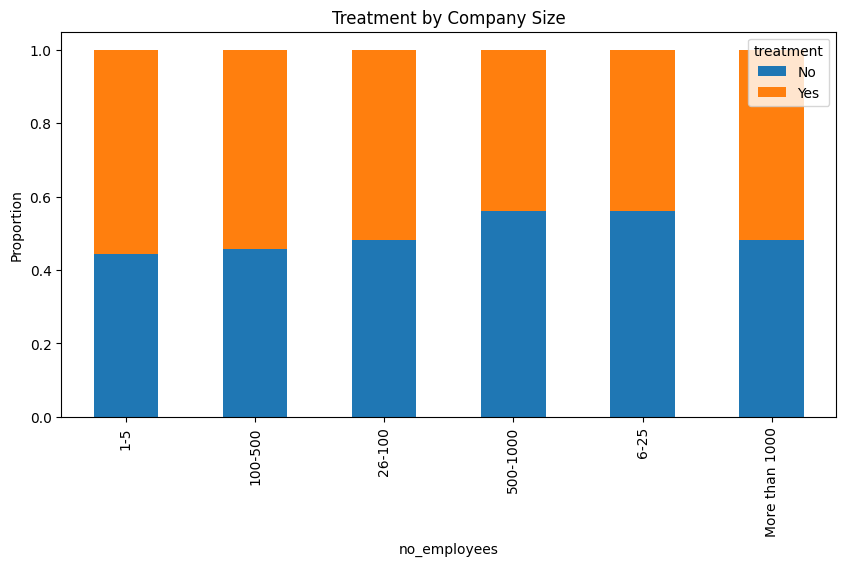

In [18]:
# Treatment by comapny size
treatment_by_employees = df.groupby('no_employees')['treatment'].value_counts(normalize=True).unstack()
treatment_by_employees.plot(kind='bar', stacked=True, figsize=(10,5))
plt.title('Treatment by Company Size')
plt.ylabel('Proportion')
plt.show()

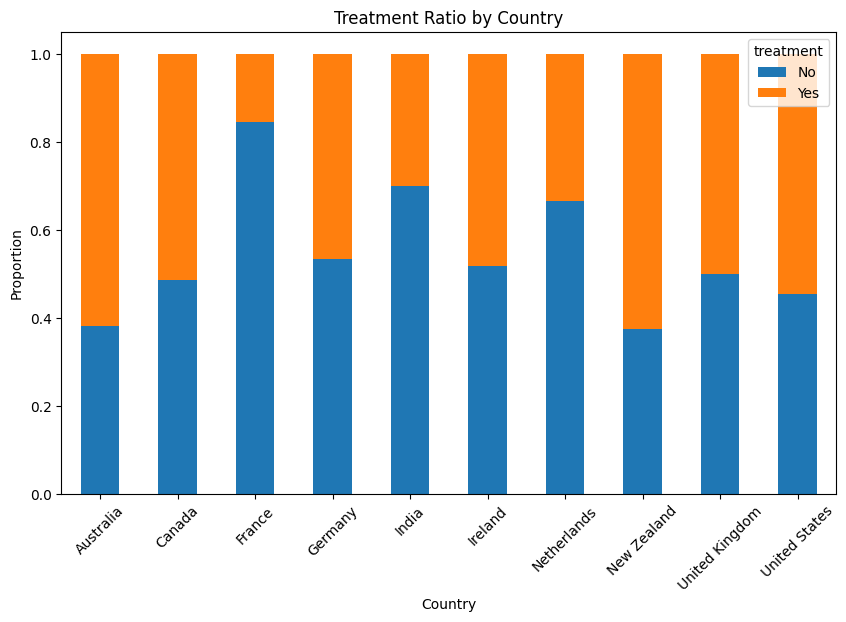

In [19]:
# Treatment ratio by country  top 10
top_countries = df['Country'].value_counts().head(10).index
country_df = df[df['Country'].isin(top_countries)]
country_treatment = country_df.groupby('Country')['treatment'].value_counts(normalize=True).unstack()
country_treatment.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Treatment Ratio by Country')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.show()

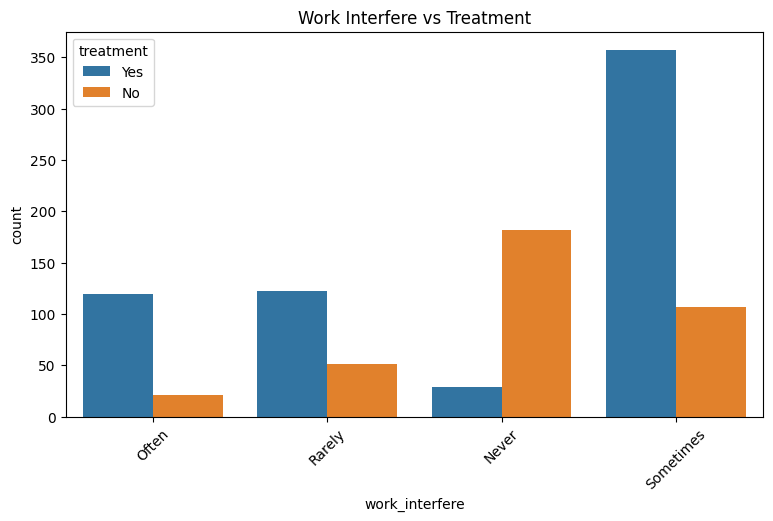

In [32]:
#work interfare vs treatment
plt.figure(figsize=(9,5))
sns.countplot(data=df, x='work_interfere', hue='treatment')
plt.title('Work Interfere vs Treatment')
plt.xticks(rotation=45)
plt.show()

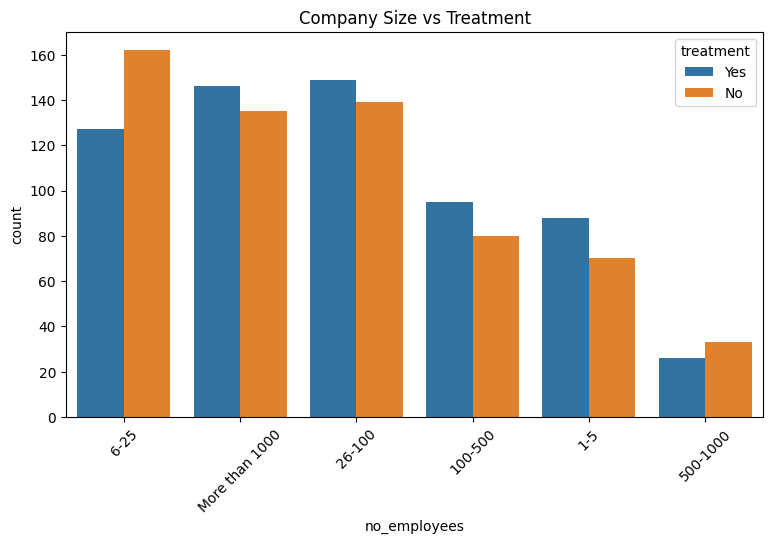

In [35]:
# company size vs treatment
plt.figure(figsize=(9,5))
sns.countplot(data=df, x='no_employees', hue='treatment')
plt.title('Company Size vs Treatment')
plt.xticks(rotation=45)
plt.show()

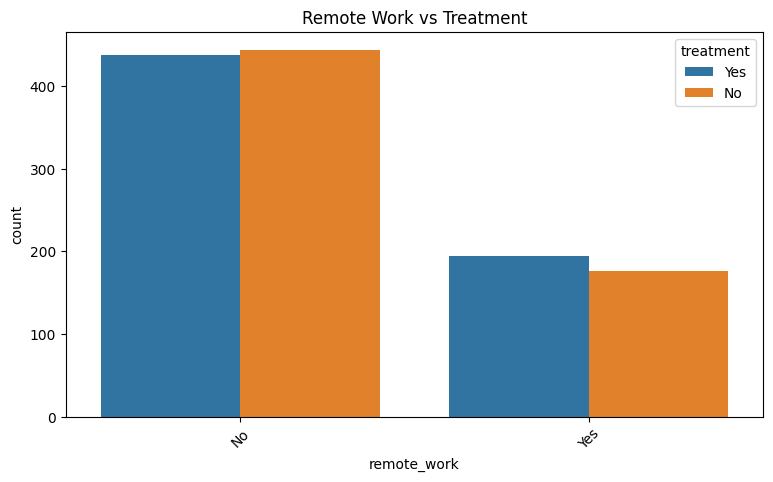

In [36]:
#Remote work vs treatment
plt.figure(figsize=(9,5))
sns.countplot(data=df, x='remote_work', hue='treatment')
plt.title('Remote Work vs Treatment')
plt.xticks(rotation=45)
plt.show()


In [20]:
df.to_csv("cleaned_survey.csv", index=False)
print("Cleaned data saved as 'cleaned_survey.csv'")

Cleaned data saved as 'cleaned_survey.csv'
